<a href="https://colab.research.google.com/github/Al3jandraMtz/Proyecto4_DataLab/blob/main/Proyecto4_DataLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Normalizar los datos
import pandas as pd

# Cargar dataset
df = pd.read_csv('/content/cleaned_URL_content_ - results-20240814-093353.csv')

# Dividir las columnas con múltiples valores
df['user_id'] = df['user_id'].str.split(',')
df['user_name'] = df['user_name'].str.split(',')
df['review_id'] = df['review_id'].str.split(',')
df['review_title'] = df['review_title'].str.split(',')
df['cleaned_review_content'] = df['cleaned_review_content'].str.split(',')

# Aplicar la longitud mínima a todas las columnas

min_len = df[['user_id', 'user_name', 'review_id', 'review_title', 'cleaned_review_content']].applymap(len).min(axis=1)

df['user_id'] = df['user_id'].apply(lambda x: x[:min(min_len)])
df['user_name'] = df['user_name'].apply(lambda x: x[:min(min_len)])
df['review_id'] = df['review_id'].apply(lambda x: x[:min(min_len)])
df['review_title'] = df['review_title'].apply(lambda x: x[:min(min_len)])
df['cleaned_review_content'] = df['cleaned_review_content'].apply(lambda x: x[:min(min_len)])

# Convertir los textos de review_title y cleaned_review_content a minúsculas
df['review_title'] = df['review_title'].apply(lambda x: [i.lower() for i in x])
df['cleaned_review_content'] = df['cleaned_review_content'].apply(lambda x: [i.lower() for i in x])

# Explotar las columnas
df = df.explode(['user_id', 'user_name', 'review_id', 'review_title', 'cleaned_review_content'])

# Limpiar rating_count eliminando comas y convertir a entero
df['rating_count'] = df['rating_count'].str.replace(',', '').fillna(0).astype(int)

# Convertir rating a flotante
df['adjusted_rating'] = df['adjusted_rating'].astype(float)

# Guardar los datos limpios
df.to_csv('Data-Limpio1.csv', index=False)


<ipython-input-2-5760c34ecfd6>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  min_len = df[['user_id', 'user_name', 'review_id', 'review_title', 'cleaned_review_content']].applymap(len).min(axis=1)


In [ ]:
#Normalizacion de review_id, user_name, user_id
expanded_rows = []

# Cargar el DataFrame
df = pd.read_csv('/content/amazon - amazon_review.csv')

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    # Split the columns by comma
    user_ids = row['user_id'].split(',')
    user_names = row['user_name'].split(',')
    review_ids = row['review_id'].split(',')
    review_titles = row['review_title'].split(',')
    review_contents = row['review_content'].split(',')

    # Count the number of reviews
    num_reviews = len(user_ids)

    # Check for consistency
    consistent = (len(user_names) == num_reviews and
                  len(review_ids) == num_reviews and
                  len(review_titles) == num_reviews and
                  len(review_contents) == num_reviews)

    # For each review, create a new row in the expanded DataFrame
    for i in range(num_reviews):
        expanded_rows.append({
            'user_id': user_ids[i],
            'user_name': user_names[i],
            'review_id': review_ids[i],
            'review_title': review_titles[i],
            'review_content': review_contents[i],
            'img_link': row['img_link'],
            'product_link': row['product_link'],
            'product_id': row['product_id'],
            'rating': row['rating'],
            'rating_count': row['rating_count'],
            'mismatch': not consistent
        })

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Guardar los resultados en un nuevo CSV en el directorio actual
df.to_csv('amazon_review_expanded.csv', index=False)

# Display the first few rows of the new DataFrame
expanded_df.head()


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count,mismatch
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav,R3HXWT0LRP0NMF,Satisfied,Looks durable Charging is fine tooNo complains,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269",True
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta,R2AJM3LFTLZHFO,Charging is really fast,Charging is really fast,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269",True
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep,R6AQJGUP6P86,Value for money,good product.,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269",True
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,S.Sayeed Ahmed,R1KD19VHEDV0OR,Product review,Till now satisfied with the quality.,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269",True
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,jaspreet singh,R3C02RMYQMK6FC,Good quality,This is a good product . The charging speed is...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269",True


In [ ]:
# Cargar el DataFrame
df = pd.read_csv('/content/Data-Limpio1.csv')

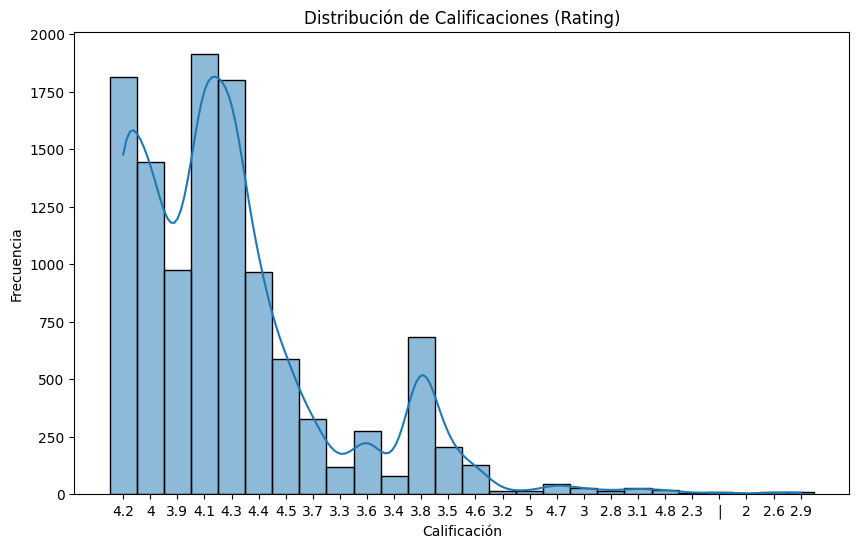

In [ ]:
# Cargar el DataFrame
df = pd.read_csv('/content/Data-Limpio1.csv')

#Visualizar Distribuicion
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la distribución de la variable 'rating'
plt.figure(figsize=(10, 6))
sns.histplot(expanded_df['rating'], bins=10, kde=True)
plt.title('Distribución de Calificaciones (Rating)')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()


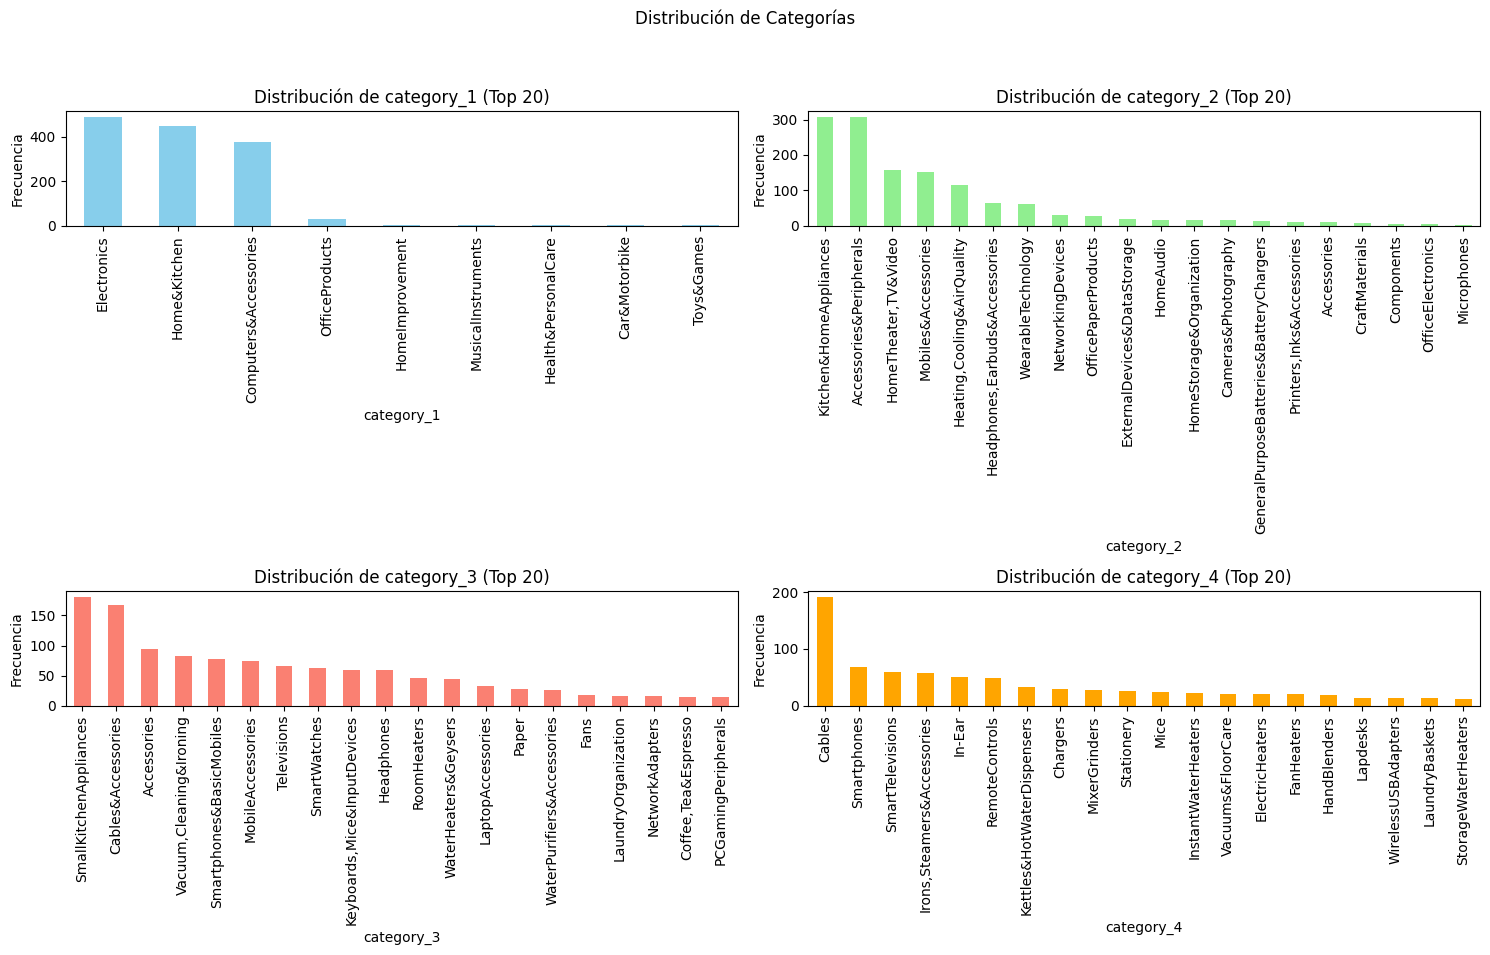

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear una figura y ejes para los histogramas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Categorías')

# Filtrar y graficar las 20 categorías más frecuentes para category_1
df['category_1'].value_counts().nlargest(20).plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución de category_1 (Top 20)')
axes[0, 0].set_xlabel('category_1')
axes[0, 0].set_ylabel('Frecuencia')

# Filtrar y graficar las 20 categorías más frecuentes para category_2
df['category_2'].value_counts().nlargest(20).plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribución de category_2 (Top 20)')
axes[0, 1].set_xlabel('category_2')
axes[0, 1].set_ylabel('Frecuencia')

# Filtrar y graficar las 20 categorías más frecuentes para category_3
df['category_3'].value_counts().nlargest(20).plot(kind='bar', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Distribución de category_3 (Top 20)')
axes[1, 0].set_xlabel('category_3')
axes[1, 0].set_ylabel('Frecuencia')

# Filtrar y graficar las 20 categorías más frecuentes para category_4
df['category_4'].value_counts().nlargest(20).plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribución de category_4 (Top 20)')
axes[1, 1].set_xlabel('category_4')
axes[1, 1].set_ylabel('Frecuencia')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar los histogramas
plt.show()


In [ ]:
#Medidas de tendencia central actual_price
import pandas as pd

# Eliminar las comas y convertir a float
df['actual_price'] = df['actual_price'].str.replace(',', '').astype(float)

# Calcular las medidas de dispersión
desviacion_estandar = df['actual_price'].std()
varianza = df['actual_price'].var()
rango = df['actual_price'].max() - df['actual_price'].min()
rango_intercuartil = df['actual_price'].quantile(0.75) - df['actual_price'].quantile(0.25)

# Mostrar los resultados
print(f"Desviación Estándar: {desviacion_estandar}")
print(f"Varianza: {varianza}")
print(f"Rango: {rango}")
print(f"Rango Intercuartil (IQR): {rango_intercuartil}")



Desviación Estándar: 11218.918302393395
Varianza: 125864127.8757775
Rango: 139861.0
Rango Intercuartil (IQR): 3676.0


In [ ]:
#Percentiles
import pandas as pd

# Convertir la columna 'rating_count' a numérico
expanded_df['rating_count'] = pd.to_numeric(expanded_df['rating_count'], errors='coerce')

# Ahora puedes calcular los percentiles
percentil_25 = expanded_df['rating_count'].quantile(0.25)
percentil_50 = expanded_df['rating_count'].quantile(0.50)  # También es la mediana
percentil_75 = expanded_df['rating_count'].quantile(0.75)

print(f"Percentil 25: {percentil_25}")
print(f"Mediana (Percentil 50): {percentil_50}")
print(f"Percentil 75: {percentil_75}")


Percentil 25: 128.0
Mediana (Percentil 50): 305.0
Percentil 75: 557.0


In [ ]:
#Cuartiles
# Calcular cuartiles explícitamente
cuartil_1 = expanded_df['rating_count'].quantile(0.25)
cuartil_2 = expanded_df['rating_count'].quantile(0.50)  # Es lo mismo que la mediana
cuartil_3 = expanded_df['rating_count'].quantile(0.75)

print(f"Cuartil 1 (Q1): {cuartil_1}")
print(f"Cuartil 2 (Q2): {cuartil_2} (Mediana)")
print(f"Cuartil 3 (Q3): {cuartil_3}")


Cuartil 1 (Q1): 128.0
Cuartil 2 (Q2): 305.0 (Mediana)
Cuartil 3 (Q3): 557.0


# Analisis de sentimientos

In [ ]:
#Analisis de Sentimientos (palabras positivas y negativas)
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

# Descargar el recurso vader_lexicon
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimiento
sia = SentimentIntensityAnalyzer()

# Cargar el DataFrame
df = pd.read_csv('/content/cleaned_URL_content_ - results-20240814-093353.csv')
# Función para analizar el sentimiento y extraer palabras
def extract_sentiment_words(text):
    sentiment_words = {'positive': [], 'negative': []}
    # Analizar el sentimiento de cada palabra en el texto
    for word in text.split():
        sentiment = sia.polarity_scores(word)
        if sentiment['compound'] >= 0.05:  # Umbral para positivo
            sentiment_words['positive'].append(word)
        elif sentiment['compound'] <= -0.05:  # Umbral para negativo
            sentiment_words['negative'].append(word)
    return sentiment_words

# Aplicar la función a la columna cleaned_review_content
df['sentiment_words'] = df['cleaned_review_content'].apply(extract_sentiment_words)

# Contar las palabras más comunes en positivas y negativas
positive_words = Counter([word for words in df['sentiment_words'].apply(lambda x: x['positive']) for word in words])
negative_words = Counter([word for words in df['sentiment_words'].apply(lambda x: x['negative']) for word in words])

# Imprimir los resultados
print("Top Positive Words:")
print(positive_words.most_common(20))

print("\nTop Negative Words:")
print(negative_words.most_common(20))

# Guardar los resultados en un nuevo CSV en el directorio actual
df.to_csv('results.csv', index=False)

# Mostrar el resultado
print(df[['review_title', 'cleaned_review_content', 'sentiment_words']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Top Positive Words:
[('good', 3748), ('like', 1028), ('easy', 626), ('well', 626), ('better', 517), ('great', 475), ('best', 443), ('Good', 392), ('fine', 386), ('nice', 358), ('Amazon', 301), ('worth', 273), ('want', 262), ('value', 248), ('original', 214), ('recommend', 205), ('easily', 202), ('support', 194), ('useful', 183), ('ok', 173)]

Top Negative Words:
[('no', 750), ('problem', 282), ('low', 243), ('No', 215), ('bad', 187), ('hard', 126), ('stopped', 88), ('poor', 82), ('difficult', 77), ('lag', 75), ('damaged', 67), ('lower', 65), ('disappointed', 59), ('charged', 58), ('loose', 57), ('charges', 57), ('missing', 56), ('cut', 54), ('damage', 50), ('defective', 48)]
                                           review_title  \
0     Easy to keep and useGood for quick fixesAverag...   
1     GoodDoes the job Works with two devicesPositiv...   
2     Material not worthStable for useOverall produc...   
3     Value for money laptop for normal usageWorks w...   
4     Beat projector 

In [ ]:
#Analisis de Sentimientos acomodo de palabras positivas/negativas
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

# Descargar el recurso vader_lexicon
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimiento
sia = SentimentIntensityAnalyzer()

# Cargar el DataFrame
df = pd.read_csv('/content/Data-Limpio1.csv')

# Función para analizar el sentimiento y extraer palabras
def extract_sentiment_words(text):
    sentiment_words = {'positive': [], 'negative': []}
    # Analizar el sentimiento de cada palabra en el texto
    for word in text.split():
        sentiment = sia.polarity_scores(word)
        if sentiment['compound'] >= 0.05:  # Umbral para positivo
            sentiment_words['positive'].append(word)
        elif sentiment['compound'] <= -0.05:  # Umbral para negativo
            sentiment_words['negative'].append(word)
    return sentiment_words

# Aplicar la función a la columna cleaned_review_content
df['sentiment_words'] = df['cleaned_review_content'].apply(extract_sentiment_words)

# Contar las palabras más comunes en positivas y negativas
positive_words = Counter([word for words in df['sentiment_words'].apply(lambda x: x['positive']) for word in words])
negative_words = Counter([word for words in df['sentiment_words'].apply(lambda x: x['negative']) for word in words])

# Crear DataFrame para las Top Positive Words
df_positive = pd.DataFrame(positive_words.most_common(20), columns=['Word', 'Count'])
df_positive['Sentiment'] = 'Positive'

# Crear DataFrame para las Top Negative Words
df_negative = pd.DataFrame(negative_words.most_common(20), columns=['Word', 'Count'])
df_negative['Sentiment'] = 'Negative'

# Combinar ambos DataFrames
df_top_words = pd.concat([df_positive, df_negative])

# Guardar los resultados en un nuevo CSV en el directorio actual
df_top_words.to_csv('top_sentiment_words.csv', index=False)

# Mostrar el DataFrame resultante
print(df_top_words)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


            Word  Count Sentiment
0           good   4179  Positive
1           like   1065  Positive
2           easy    743  Positive
3           well    653  Positive
4         better    548  Positive
5          great    533  Positive
6           best    521  Positive
7           nice    435  Positive
8         amazon    405  Positive
9           fine    399  Positive
10         value    329  Positive
11         worth    327  Positive
12          want    263  Positive
13            ok    232  Positive
14      original    228  Positive
15     recommend    215  Positive
16        easily    208  Positive
17       support    206  Positive
18        useful    187  Positive
19         happy    187  Positive
0             no    987  Negative
1        problem    290  Negative
2            low    255  Negative
3            bad    197  Negative
4           hard    137  Negative
5        stopped     93  Negative
6           poor     87  Negative
7      difficult     80  Negative
8            l

In [ ]:
print(df.columns)

Index(['product_id', 'product_name', 'category_1', 'category_2', 'category_3',
       'category_4', 'discounted_price', 'actual_price', 'discount_percentage',
       'about_product', 'user_id', 'user_name', 'user_id_count', 'review_id',
       'review_title', 'cleaned_review_content', 'rating_count',
       'adjusted_rating', 'sentiment_words'],
      dtype='object')


In [ ]:
#Tokenizacion con nltk
import nltk
nltk.download('punkt')  # Descarga el paquete de tokenización

# Tokenizar cada contenido de la reseña en la columna 'cleaned_review_content'
df['tokenized_review'] = df['cleaned_review_content'].apply(nltk.word_tokenize)

# Mostrar los primeros registros con las reseñas tokenizadas
print(df[['cleaned_review_content', 'tokenized_review']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                              cleaned_review_content  \
0  its good product you can face challenge in sta...   
1  atlast i connected successfully working good b...   
2  i can say costly although it can do the jobi l...   
3  if you are looking for a decent laptop and res...   
4  good projector for this price rangenice pictur...   

                                    tokenized_review  
0  [its, good, product, you, can, face, challenge...  
1  [atlast, i, connected, successfully, working, ...  
2  [i, can, say, costly, although, it, can, do, t...  
3  [if, you, are, looking, for, a, decent, laptop...  
4  [good, projector, for, this, price, rangenice,...  


In [ ]:
#Eliminar Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))

df['filtered_tokens'] = df['tokenized_review'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

print(df[['tokenized_review', 'filtered_tokens']].head())


                                    tokenized_review  \
0  [its, good, product, you, can, face, challenge...   
1  [atlast, i, connected, successfully, working, ...   
2  [i, can, say, costly, although, it, can, do, t...   
3  [if, you, are, looking, for, a, decent, laptop...   
4  [good, projector, for, this, price, rangenice,...   

                                     filtered_tokens  
0  [its, good, product, you, can, face, challenge...  
1  [atlast, i, connected, successfully, working, ...  
2  [i, can, say, costly, although, it, can, do, t...  
3  [if, you, are, looking, for, decent, laptop, a...  
4  [good, projector, for, this, price, rangenice,...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Stemming  (reducir las palabras a su raiz)
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('spanish')

df['stemmed_tokens'] = df['filtered_tokens'].apply(
    lambda tokens: [stemmer.stem(word) for word in tokens]
)

print(df[['filtered_tokens', 'stemmed_tokens']].head())


                                     filtered_tokens  \
0  [its, good, product, you, can, face, challenge...   
1  [atlast, i, connected, successfully, working, ...   
2  [i, can, say, costly, although, it, can, do, t...   
3  [if, you, are, looking, for, decent, laptop, a...   
4  [good, projector, for, this, price, rangenice,...   

                                      stemmed_tokens  
0  [its, good, product, you, can, fac, challeng, ...  
1  [atlast, i, connect, successfully, working, go...  
2  [i, can, say, costly, although, it, can, do, t...  
3  [if, you, are, looking, for, decent, laptop, a...  
4  [good, projector, for, this, pric, rangenic, p...  


In [ ]:
from textblob import TextBlob

# Crear una función para analizar el sentimiento
def analyze_sentiment(text):
    return TextBlob(" ".join(text)).sentiment.polarity

# Aplicar la función de sentimiento a las tokens lematizadas
df['sentiment'] = df['stemmed_tokens'].apply(analyze_sentiment)

print(df[['stemmed_tokens', 'sentiment']].head())

# Guardar el DataFrame en CSV
df.to_csv('/content/Data-Set-Sentimiento1.csv', index=False)

print("El DataFrame con la columna 'sentiment' ha sido guardado como 'Data-Set-Sentimiento1.csv'.")


                                      stemmed_tokens  sentiment
0  [its, good, product, you, can, fac, challeng, ...   0.345417
1  [atlast, i, connect, successfully, working, go...   0.086984
2  [i, can, say, costly, although, it, can, do, t...   0.577500
3  [if, you, are, looking, for, decent, laptop, a...   0.252041
4  [good, projector, for, this, pric, rangenic, p...   0.261765
El DataFrame con la columna 'sentiment' ha sido guardado como 'Data-Set-Sentimiento1.csv'.


Fila 0:

Tokens: ['its', 'good', 'product', 'you', 'can', 'fac', 'challeng', ...]
Sentimiento: 0.345417
Interpretación: Este valor de sentimiento (0.345417) sugiere un sentimiento moderadamente positivo. Es probable que el texto esté expresando una opinión favorable, indicando que el producto cumple con las expectativas y es útil en el contexto mencionado.

Fila 1:

Tokens: ['atlast', 'i', 'connect', 'successfully', 'working', 'go', ...]
Sentimiento: 0.086984
Interpretación: Este valor de sentimiento (0.086984) indica un sentimiento ligeramente positivo, pero bastante débil. Es posible que el texto refleje un resultado positivo, aunque con alguna duda o con una experiencia que no fue totalmente satisfactoria.

Fila 2:

Tokens: ['i', 'can', 'say', 'costly', 'although', 'it', 'can', 'do', 't', ...]
Sentimiento: 0.577500
Interpretación: Este valor de sentimiento (0.577500) es marcadamente positivo, lo que sugiere que el texto transmite una opinión favorable y sólida. Es probable que el autor del texto esté satisfecho con el producto, a pesar de posibles inconvenientes mencionados, como el costo.

Fila 3:

Tokens: ['if', 'you', 'are', 'looking', 'for', 'decent', 'laptop', 'a', ...]
Sentimiento: 0.252041
Interpretación: Este valor de sentimiento (0.252041) indica un sentimiento moderadamente positivo. El texto probablemente expresa una opinión bastante favorable, aunque puede mencionar alguna advertencia o limitación sobre el producto.

Fila 4:

Tokens: ['good', 'projector', 'for', 'this', 'pric', 'rangenic', 'p', ...]
Sentimiento: 0.261765
Interpretación: Este valor de sentimiento (0.261765) sugiere un sentimiento ligeramente positivo. El texto parece expresar una opinión favorable sobre el producto, destacando aspectos positivos, aunque tal vez con ciertas reservas sobre el precio o alguna otra característica.

In [ ]:
# Cargar el DataFrame
df = pd.read_csv('/content/Data-Set-Sentimiento1.csv')

In [ ]:
print(df.columns)


Index(['product_id', 'product_name', 'category_1', 'category_2', 'category_3',
       'category_4', 'discounted_price', 'actual_price', 'discount_percentage',
       'about_product', 'user_id', 'user_name', 'user_id_count', 'review_id',
       'review_title', 'cleaned_review_content', 'rating_count',
       'adjusted_rating', 'sentiment_words', 'tokenized_review',
       'filtered_tokens', 'stemmed_tokens', 'sentiment'],
      dtype='object')


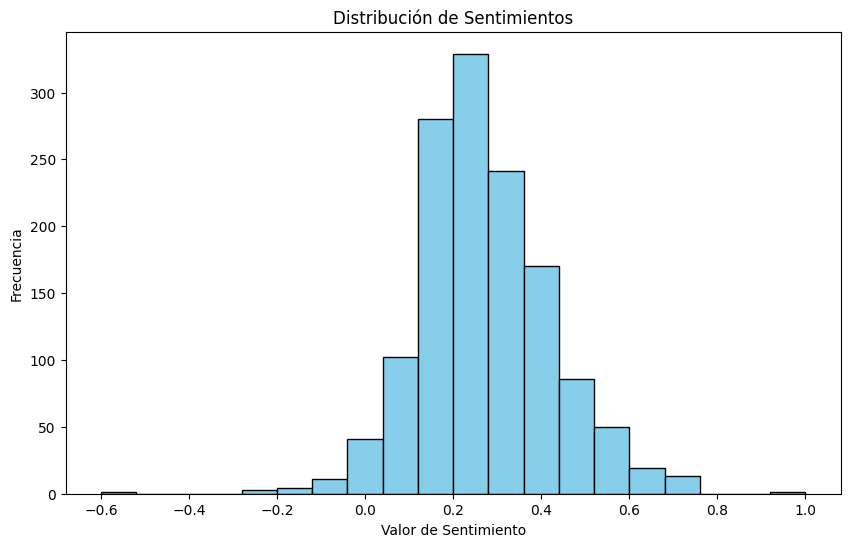

In [ ]:
#Distribucion de los sentimientos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Sentimientos')
plt.xlabel('Valor de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
print(df.columns)


Index(['product_id', 'product_name', 'category_1', 'category_2', 'category_3',
       'category_4', 'discounted_price', 'actual_price', 'discount_percentage',
       'about_product', 'user_id', 'user_name', 'user_id_count', 'review_id',
       'review_title', 'cleaned_review_content', 'rating_count',
       'adjusted_rating', 'sentiment_words', 'tokenized_review',
       'filtered_tokens', 'stemmed_tokens', 'sentiment'],
      dtype='object')


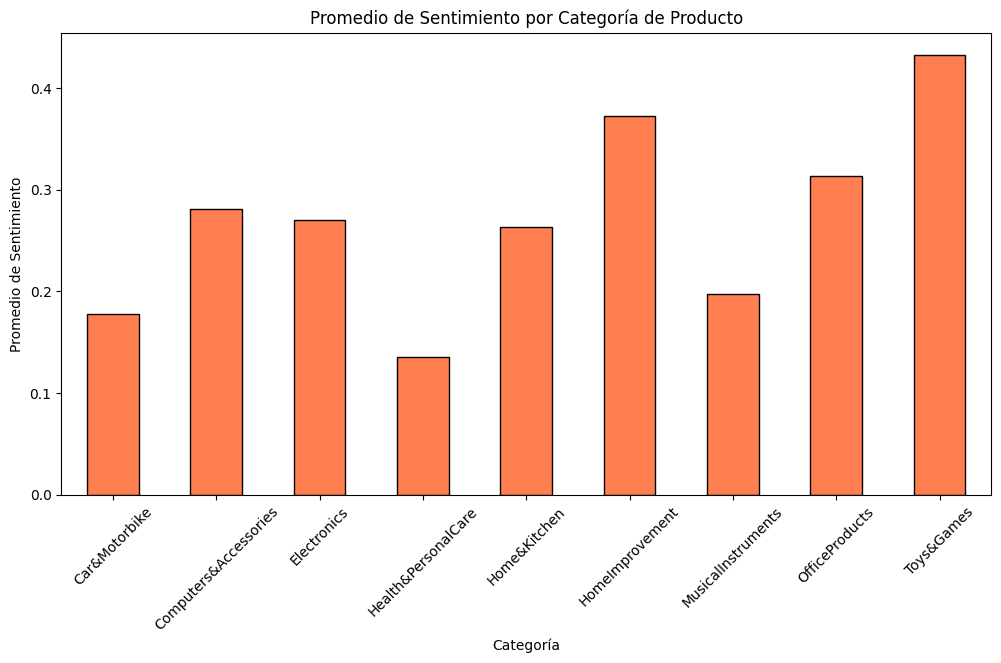

In [ ]:
sentiment_by_category = df.groupby('category_1')['sentiment'].mean()

plt.figure(figsize=(12, 6))
sentiment_by_category.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Promedio de Sentimiento por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Promedio de Sentimiento')
plt.xticks(rotation=45)
plt.show()


Interpretación:
*Toys & Games: Tiene el promedio de sentimiento más alto, superior a 0.4. Esto sugiere que los productos en esta categoría generan una respuesta muy positiva en los usuarios.

*Home & Kitchen y Home Improvement: Ambas categorías también muestran un promedio de sentimiento alto, cercano a 0.4. Esto indica que los productos para el hogar son bien recibidos por los consumidores, con reseñas generalmente positivas.

*Office Products y Electronics: Estas categorías tienen un promedio de sentimiento moderado, alrededor de 0.3, lo que indica una percepción positiva, pero no tan fuerte como en las categorías mencionadas anteriormente.

*Computers & Accessories y Cars & Motorbike: Estas categorías tienen un promedio de sentimiento ligeramente inferior, cerca de 0.25, lo que sugiere una percepción favorable, aunque menos entusiasta que otras categorías.

*Musical Instruments y Health & Personal Care: Estas categorías tienen los promedios de sentimiento más bajos, siendo "Health & Personal Care" la que tiene el promedio más bajo, cercano a 0.15. Esto sugiere que las reseñas en estas categorías son menos positivas en comparación con las demás, lo que podría indicar problemas o insatisfacción con ciertos productos.

## Correlación entre variables

In [ ]:
print(df.columns)


Index(['product_id', 'product_name', 'category_1', 'category_2', 'category_3',
       'category_4', 'discounted_price', 'actual_price', 'discount_percentage',
       'about_product', 'user_id', 'user_name', 'user_id_count', 'review_id',
       'review_title', 'cleaned_review_content', 'rating_count',
       'adjusted_rating', 'sentiment_words', 'tokenized_review',
       'filtered_tokens', 'stemmed_tokens', 'sentiment'],
      dtype='object')


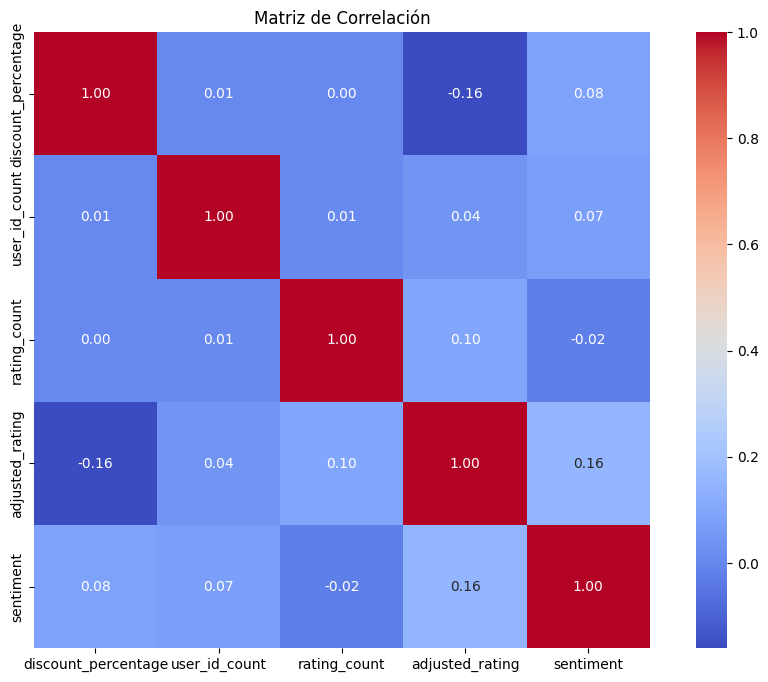

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Matriz de Correlación')
plt.show()


### Hipótesis 1.

In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('/content/Data-Set-Sentimiento1.csv')

# Mostrar las primeras filas del DataFrame para confirmar que se cargó correctamente
print(df.head())


   product_id                                       product_name  \
0  B08XLR6DSB  akiara - Makes life easy Electric Handy Sewing...   
1  B0978V2CP6  Cubetek 3 in 1 LCD Display V5.0 Bluetooth Tran...   
2  B07WKBD37W  ESnipe Mart Worldwide Travel Adapter with Buil...   
3  B0B2RBP83P  Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6" ...   
4  B0BLV1GNLN  WZATCO Pixel | Portable LED Projector | Native...   

              category_1              category_2                  category_3  \
0           Home&Kitchen  Kitchen&HomeAppliances  SewingMachines&Accessories   
1            Electronics    HomeTheater,TV&Video      AVReceivers&Amplifiers   
2        HomeImprovement              Electrical      Adapters&Multi-Outlets   
3  Computers&Accessories                 Laptops          TraditionalLaptops   
4            Electronics    HomeTheater,TV&Video                  Projectors   

                  category_4 discounted_price actual_price  \
0  Sewing&EmbroideryMachines              721   

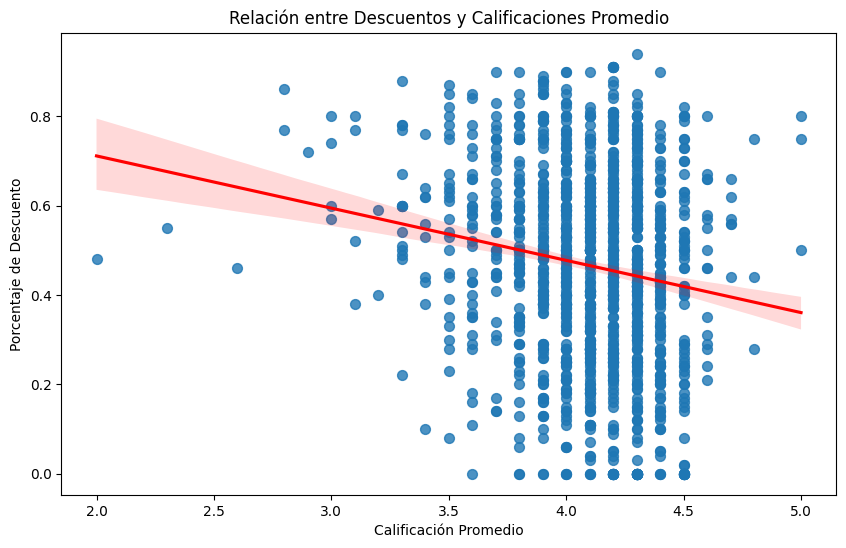

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gáfica de dispersión con una línea de tendencia
plt.figure(figsize=(10, 6))
sns.regplot(x='adjusted_rating', y='discount_percentage', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Relación entre Descuentos y Calificaciones Promedio')
plt.xlabel('Calificación Promedio')
plt.ylabel('Porcentaje de Descuento')
plt.show()


In [ ]:
import pandas as pd

# Contar el número de datos por categoría
category_counts = df['category_1'].value_counts()

# Filtrar las categorías que tienen menos de 2 datos para evitar NaNs en la correlación
valid_categories = category_counts[category_counts > 1].index
df_filtered = df[df['category_1'].isin(valid_categories)]

# Crear una función para calcular la correlación por categoría
def calculate_correlation(group):
    if len(group) > 1:
        return group['discount_percentage'].corr(group['adjusted_rating'])
    else:
        return None

# Aplicar la función de correlación a cada grupo de 'category_1'
correlation_by_category = df_filtered.groupby('category_1').apply(calculate_correlation).reset_index()

# Renombrar las columnas para mayor claridad
correlation_by_category.columns = ['category_1', 'correlation']

# Filtrar resultados que no son NaN
correlation_by_category = correlation_by_category.dropna()

# Mostrar los resultados
print(correlation_by_category)


              category_1  correlation
0  Computers&Accessories    -0.101518
1            Electronics    -0.192301
2           Home&Kitchen    -0.237350
3        HomeImprovement     1.000000
4     MusicalInstruments     1.000000
5         OfficeProducts    -0.135102


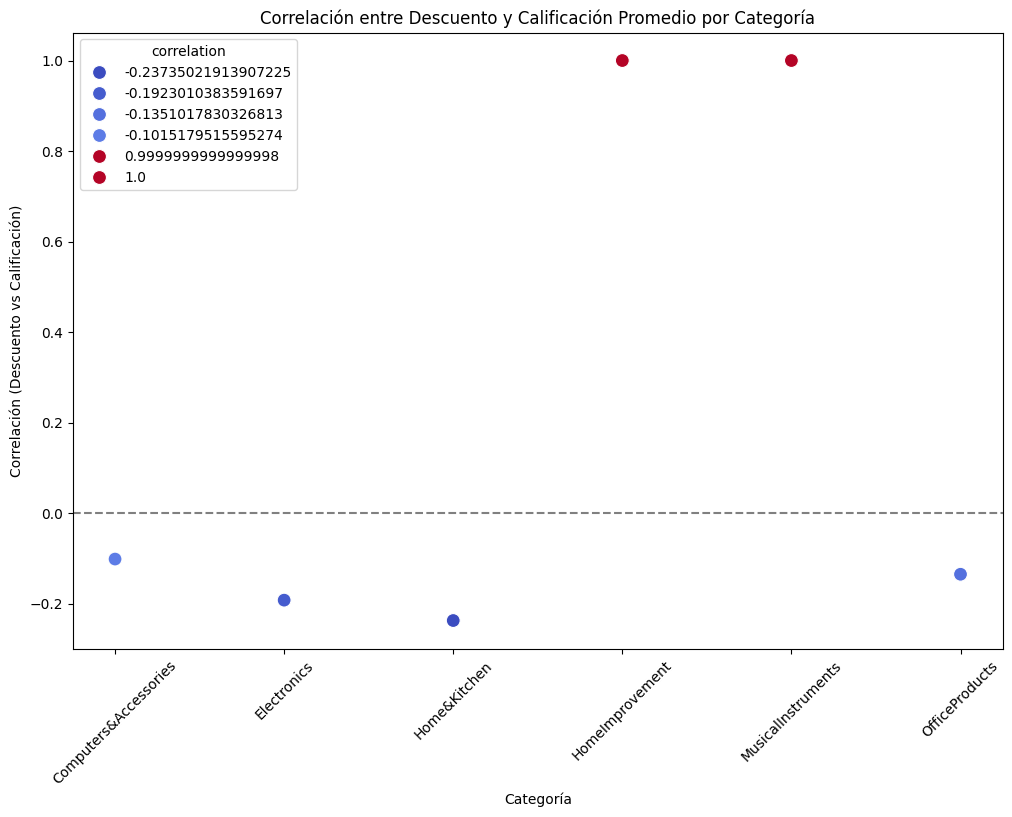

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar categorías con NaN en la correlación
correlation_by_category = correlation_by_category.dropna()

# Crear la gráfica de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=correlation_by_category, x='category_1', y='correlation', hue='correlation', palette='coolwarm', s=100)

# Añadir detalles al gráfico
plt.title('Correlación entre Descuento y Calificación Promedio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Correlación (Descuento vs Calificación)')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.show()


### 2.- Hipótesis sobre la Gestión de la Reputación y Reseñas Negativas:

 "Un mayor número de reseñas negativas está asociado con una menor calificación promedio de los productos."

In [ ]:
import pandas as pd

# Cargar los datos desde el archivo CSV
file_path = '/content/Data-Set-Sentimiento1.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para revisar
df.head()


,product_id,product_name,category_1,category_2,category_3,category_4,discounted_price,actual_price,discount_percentage,about_product,...,user_id_count,review_id,review_title,cleaned_review_content,rating_count,adjusted_rating,tokenized_review,filtered_tokens,stemmed_tokens,sentiment
0,B08XLR6DSB,akiara - Makes life easy Electric Handy Sewing...,Home&Kitchen,Kitchen&HomeAppliances,SewingMachines&Accessories,Sewing&EmbroideryMachines,721,1499.0,0.52,Mini hand Sewing Machine Stapler style is quic...,...,8,RYO77QIQ3J77O,easy to keep and usegood for quick fixesaverag...,its good product you can face challenge in sta...,2449,3.1,"['its', 'good', 'product', 'you', 'can', 'face...","['its', 'good', 'product', 'you', 'can', 'face...","['its', 'good', 'product', 'you', 'can', 'fac'...",0.345417
1,B0978V2CP6,Cubetek 3 in 1 LCD Display V5.0 Bluetooth Tran...,Electronics,"HomeTheater,TV&Video",AVReceivers&Amplifiers,NaN,"1,990",3100.0,0.36,IN V BLUETOOTH AUDIO ADAPTER It has modes TX R...,...,8,R1OK31HXJ4T85Y,gooddoes the job works with two devicespositiv...,atlast i connected successfully working good b...,897,4.0,"['atlast', 'i', 'connected', 'successfully', '...","['atlast', 'i', 'connected', 'successfully', '...","['atlast', 'i', 'connect', 'successfully', 'wo...",0.086984
2,B07WKBD37W,ESnipe Mart Worldwide Travel Adapter with Buil...,HomeImprovement,Electrical,Adapters&Multi-Outlets,NaN,425,999.0,0.57,SLOW CHARGING Input W Output W A MAX Tear Off ...,...,8,R186EFJU37UPS6,material not worthstable for useoverall produc...,i can say costly although it can do the jobi l...,2581,4.0,"['i', 'can', 'say', 'costly', 'although', 'it'...","['i', 'can', 'say', 'costly', 'although', 'it'...","['i', 'can', 'say', 'costly', 'although', 'it'...",0.577500
3,B0B2RBP83P,"Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6"" ...",Computers&Accessories,Laptops,TraditionalLaptops,NaN,"37,247",59890.0,0.38,Processor th Gen Intel Core iG Speed GHz Base ...,...,8,R2WGS6Q7F9F4Y5,value for money laptop for normal usageworks w...,if you are looking for a decent laptop and res...,323,4.0,"['if', 'you', 'are', 'looking', 'for', 'a', 'd...","['if', 'you', 'are', 'looking', 'for', 'decent...","['if', 'you', 'are', 'looking', 'for', 'decent...",0.252041
4,B0BLV1GNLN,WZATCO Pixel | Portable LED Projector | Native...,Electronics,"HomeTheater,TV&Video",Projectors,NaN,"6,490",9990.0,0.35,Small Size but Powerful Effects upgraded Pixel...,...,8,R37T34KL73SH6C,beat projector for good pricevalue for moneyex...,good projector for this price rangenice pictur...,27,4.0,"['good', 'projector', 'for', 'this', 'price', ...","['good', 'projector', 'for', 'this', 'price', ...","['good', 'projector', 'for', 'this', 'pric', '...",0.261765


In [ ]:
#Calcular reseñas positivas/negativas
import pandas as pd


# Definimos  positivas las calificaciones >= 3, y negativas < 3
threshold = 3

# Creamos la nueva columna 'positive_negative_rating'
df['positive_negative_rating'] = df['adjusted_rating'].apply(lambda x: 'positive' if x >= threshold else 'negative')

# Contamos el número de calificaciones positivas y negativas
rating_counts = df.groupby('product_id')['positive_negative_rating'].value_counts().unstack(fill_value=0)

# Renombrar columnas
rating_counts.columns = ['negative_count', 'positive_count']

#Archivo CSV
rating_counts.to_csv('/content/Data-Rating.csv', index=True)

# Mostramos un mensaje para indicar que el archivo ha sido guardado
print("El archivo 'Data-Rating.csv' ha sido generado y guardado exitosamente.")


El archivo 'Data-Rating.csv' ha sido generado y guardado exitosamente.


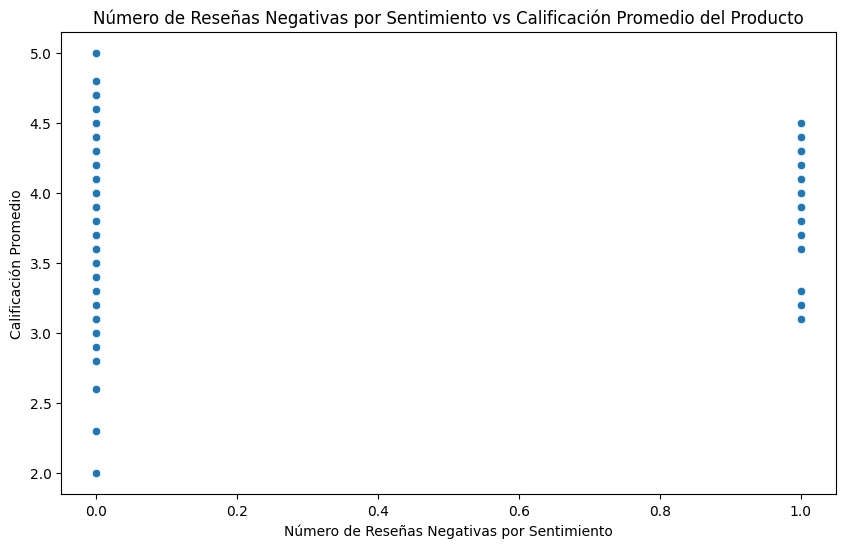

Correlación de Pearson: -0.0819667993942326
Valor p: 0.0025693394023896315


In [ ]:
#Correlación de Pearson entre las variables
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Definimos un umbral para considerar una reseña negativa en base al análisis de sentimiento
sentiment_threshold = 0  # Consideramos negativo si el puntaje es menor o igual a 0

# Creamos una columna para indicar si la reseña es negativa
df['sentiment_negative'] = df['sentiment'] <= sentiment_threshold

# Agrupamos por 'product_id' para calcular el número total de reseñas negativas y el promedio de calificación
grouped = df.groupby('product_id').agg(
    num_negative_sentiment_reviews=('sentiment_negative', 'sum'),
    avg_rating=('adjusted_rating', 'mean')
).reset_index()

# Visualizamos la relación con un scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_negative_sentiment_reviews', y='avg_rating', data=grouped)
plt.title('Número de Reseñas Negativas por Sentimiento vs Calificación Promedio del Producto')
plt.xlabel('Número de Reseñas Negativas por Sentimiento')
plt.ylabel('Calificación Promedio')
plt.show()

# Calculamos la correlación de Pearson para cuantificar la relación
correlation, p_value = pearsonr(grouped['num_negative_sentiment_reviews'], grouped['avg_rating'])

print(f'Correlación de Pearson: {correlation}')
print(f'Valor p: {p_value}')

# Guardamos el resultado en un archivo CSV si deseas
grouped.to_csv('/content/Data-Rating-Sentiment.csv', index=False)


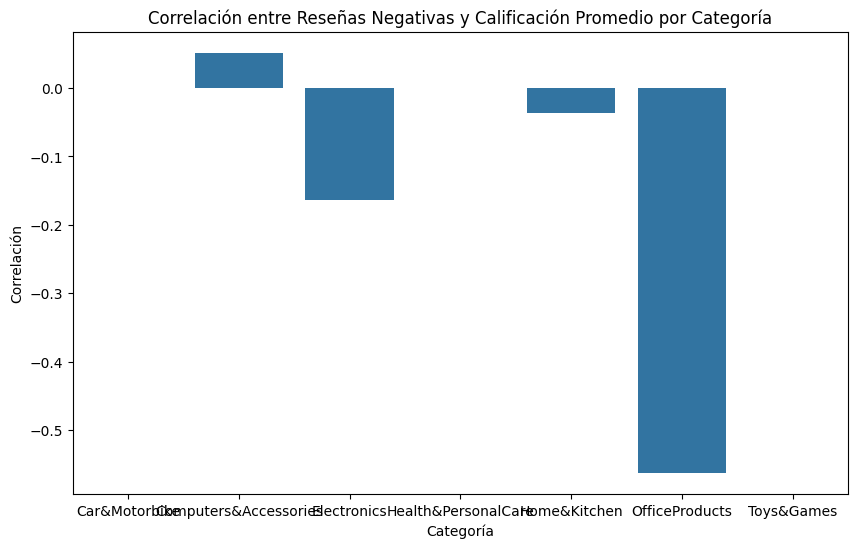

OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupamos por categoría y calculamos las métricas necesarias
category_analysis = df.groupby(['category_1', 'category_2', 'category_3', 'category_4']).agg(
    num_negative_sentiment_reviews=('sentiment_negative', 'sum'),
    avg_rating=('adjusted_rating', 'mean')
).reset_index()

# Para cada categoría, calculamos la correlación entre reseñas negativas y calificación promedio
correlations = []

for _, group in category_analysis.groupby('category_1'):
    # Verificamos que el grupo tenga al menos dos puntos de datos
    if len(group) >= 2:
        correlation, p_value = pearsonr(group['num_negative_sentiment_reviews'], group['avg_rating'])
        correlations.append({'category_1': group['category_1'].iloc[0], 'correlation': correlation, 'p_value': p_value})
    else:
        # En caso de que no haya suficientes datos, agregamos un valor nulo o cualquier otro indicador
        correlations.append({'category_1': group['category_1'].iloc[0], 'correlation': None, 'p_value': None})

# Convertimos los resultados a un DataFrame para su análisis
correlation_df = pd.DataFrame(correlations)

# Visualizamos los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x='category_1', y='correlation', data=correlation_df)
plt.title('Correlación entre Reseñas Negativas y Calificación Promedio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Correlación')
plt.show()

# Guardamos los resultados en un CSV si deseas
category_analysis.to_csv('/mnt/data/Data-Rating-Category.csv', index=False)


In [ ]:
import pandas as pd

# Filtramos las categorías con correlación negativa y valor p significativo
significant_negative_correlations = correlation_df[
    (correlation_df['correlation'] < 0) & (correlation_df['p_value'] < 0.05)
]

# Mostramos las categorías que tienen correlaciones negativas significativas
print("Categorías con correlaciones negativas significativas:")
print(significant_negative_correlations)

# Si deseas, puedes guardar este resultado en un archivo CSV para su posterior análisis
significant_negative_correlations.to_csv('/content/Significant_Negative_Correlations.csv', index=False)


Categorías con correlaciones negativas significativas:
Empty DataFrame
Columns: [category_1, correlation, p_value]
Index: []


# Hipotesis 3

Correlación: 0.09859069494817813
Valor p: 0.0003154486921404628


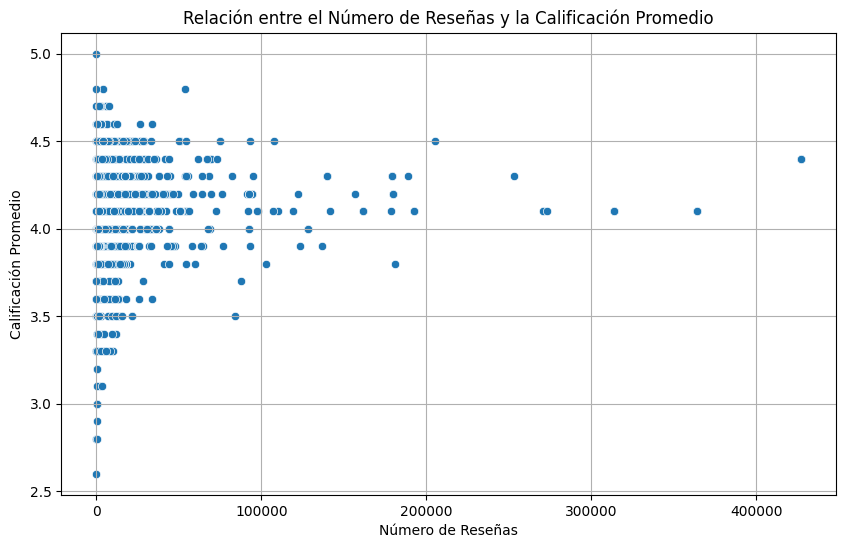

Existe una correlación significativa entre el número de reseñas y la calificación promedio.


In [ ]:
#Calcular la correlación
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Paso 1: Filtrar productos con un número significativo de reseñas
df_filtered = df[df['rating_count'] > 20]

# Paso 2: Calcular la correlación
correlation, p_value = pearsonr(df_filtered['rating_count'], df_filtered['adjusted_rating'])

print(f"Correlación: {correlation}")
print(f"Valor p: {p_value}")

# Paso 3: Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_count', y='adjusted_rating', data=df_filtered)
plt.title('Relación entre el Número de Reseñas y la Calificación Promedio')
plt.xlabel('Número de Reseñas')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()

# Paso 4: Interpretación de Resultados
if p_value < 0.05:
    print("Existe una correlación significativa entre el número de reseñas y la calificación promedio.")
else:
    print("No se encontró una correlación significativa entre el número de reseñas y la calificación promedio.")


<ipython-input-39-acb4d05a510e>:17: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(product_grouped['positive_review_count'], product_grouped['average_rating'])


Correlación: nan
Valor p: nan


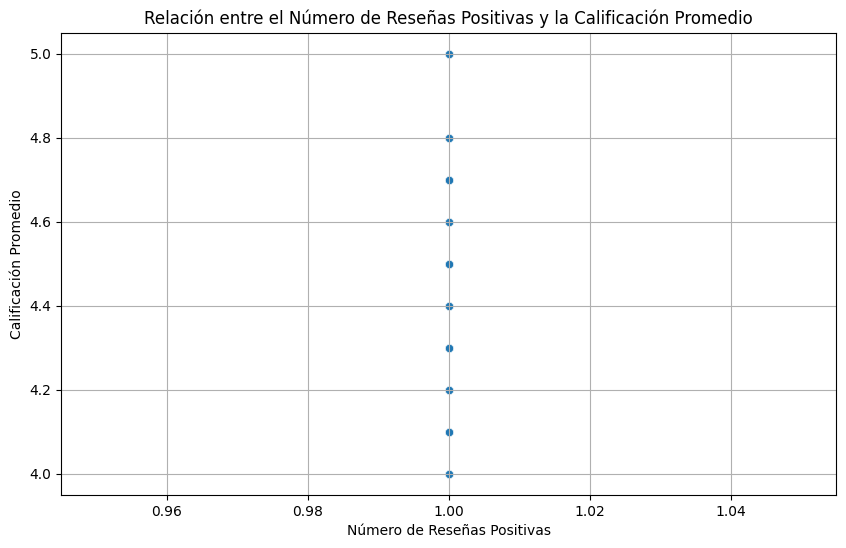

No se encontró una correlación significativa entre el número de reseñas positivas y la calificación promedio.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


# Paso 1: Filtrar reseñas positivas (calificaciones de 4 o 5 estrellas)
df_positive_reviews = df[df['adjusted_rating'] >= 4]

# Paso 2: Agrupar por producto y calcular el número de reseñas positivas y la calificación promedio
product_grouped = df_positive_reviews.groupby('product_id').agg(
    positive_review_count=('rating_count', 'size'),
    average_rating=('adjusted_rating', 'mean')
).reset_index()

# Paso 3: Calcular la correlación entre el número de reseñas positivas y la calificación promedio
correlation, p_value = pearsonr(product_grouped['positive_review_count'], product_grouped['average_rating'])

print(f"Correlación: {correlation}")
print(f"Valor p: {p_value}")

# Paso 4: Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='positive_review_count', y='average_rating', data=product_grouped)
plt.title('Relación entre el Número de Reseñas Positivas y la Calificación Promedio')
plt.xlabel('Número de Reseñas Positivas')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()

# Interpretación de Resultados
if p_value < 0.05:
    print("Existe una correlación significativa entre el número de reseñas positivas y la calificación promedio.")
else:
    print("No se encontró una correlación significativa entre el número de reseñas positivas y la calificación promedio.")


# HIPOTESIS 4

In [ ]:
#Segmentar top reseñas positivas
import pandas as pd

# Filtrar las reseñas positivas (calificaciones de 4 o 5 estrellas)
df_positive_reviews = df[df['adjusted_rating'] >= 4]

# Crear un subconjunto de datos
subset_positive_reviews = df_positive_reviews.copy()


print(subset_positive_reviews.head())

# Guardar archivo CSV para análisis posterior
subset_positive_reviews.to_csv('subset_positive_reviews.csv', index=False)


   product_id                                       product_name  \
1  B0978V2CP6  Cubetek 3 in 1 LCD Display V5.0 Bluetooth Tran...   
2  B07WKBD37W  ESnipe Mart Worldwide Travel Adapter with Buil...   
3  B0B2RBP83P  Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6" ...   
4  B0BLV1GNLN  WZATCO Pixel | Portable LED Projector | Native...   
5  B076B8G5D8  Boya ByM1 Auxiliary Omnidirectional Lavalier C...   

              category_1            category_2              category_3  \
1            Electronics  HomeTheater,TV&Video  AVReceivers&Amplifiers   
2        HomeImprovement            Electrical  Adapters&Multi-Outlets   
3  Computers&Accessories               Laptops      TraditionalLaptops   
4            Electronics  HomeTheater,TV&Video              Projectors   
5     MusicalInstruments           Microphones               Condenser   

  category_4 discounted_price  actual_price  discount_percentage  \
1        NaN            1,990        3100.0                 0.36   
2        N

In [ ]:
#Palabras clave de reseñas positivas
from collections import Counter
import pandas as pd


# Palabras tokenizadas (nueva revisión)
all_words = subset_positive_reviews['tokenized_review'].explode().tolist()

# Calcular la frecuencia de cada palabra
word_freq = Counter(all_words)

# Convertir los resultados a un DataFrame para mayor facilidad de análisis
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Ver las palabras clave más comunes
print(word_freq_df.head(20))

# Opcional: Guardar los resultados en un archivo CSV para análisis posterior
word_freq_df.to_csv('positive_review_word_frequencies.csv', index=False)


                                                  word  frequency
784  ['i', 'am', 'not', 'big', 'on', 'camera', 'usa...          8
414  ['worked', 'on', 'iphone', 'and', 'didnt', 'wo...          8
780  ['i', 'purchased', 'the', 'gb', 'variantto', '...          6
450  ['looks', 'durable', 'charging', 'is', 'fine',...          6
256  ['about', 'the', 'tv', 'wonderfulprobably', 't...          5
293  ['i', 'liked', 'it', 'worth', 'the', 'money', ...          5
251  ['pros', 'xiomi', 'a', 'is', 'best', 'in', 'bu...          5
213  ['gb', 'sd', 'card', 'is', 'showing', 'gbdont'...          5
776  ['phone', 'is', 'ok', 'except', 'middle', 'but...          4
779  ['if', 'you', 'want', 'a', 'smart', 'phone', '...          4
261  ['before', 'finalizing', 'the', 'aue', 'i', 'v...          4
474  ['material', 'os', 'very', 'good', 'initially'...          4
782  ['i', 'was', 'looking', 'for', 'a', 'phone', '...          4
453  ['good', 'productlong', 'wirecharges', 'goodni...          4
794  ['ver

In [ ]:
#Mapear de caracteristicas clave del producto

# Definir un diccionario de características del producto y palabras clave asociadas
characteristics_keywords = {
    'facilidad de uso': ['easy', 'simple', 'user-friendly', 'intuitive'],
    'rendimiento': ['performance', 'fast', 'efficient', 'powerful'],
    'durabilidad': ['durable', 'long-lasting', 'sturdy', 'robust'],
    'calidad': ['quality', 'high-quality', 'premium', 'excellent'],
}

# Crear un DataFrame para almacenar los resultados
results = []

# Analizar cada característica y sus palabras clave asociadas
for characteristic, keywords in characteristics_keywords.items():
    # Filtrar las reseñas que contienen alguna de las palabras clave para la característica
    mask = subset_positive_reviews['tokenized_review'].apply(lambda tokens: any(word in tokens for word in keywords))
    filtered_reviews = subset_positive_reviews[mask]

    # Contar la frecuencia de la característica en las reseñas positivas
    frequency = len(filtered_reviews)

    # Almacenar el resultado
    results.append({
        'characteristic': characteristic,
        'frequency': frequency,
        'percentage': (frequency / len(subset_positive_reviews)) * 100
    })

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results)

# Mostrar los resultados
print(results_df)

# Opcional: guardar los resultados en un archivo CSV
results_df.to_csv('characteristics_association_analysis.csv', index=False)


     characteristic  frequency  percentage
0  facilidad de uso        437   43.267327
1       rendimiento        409   40.495050
2       durabilidad        213   21.089109
3           calidad        719   71.188119


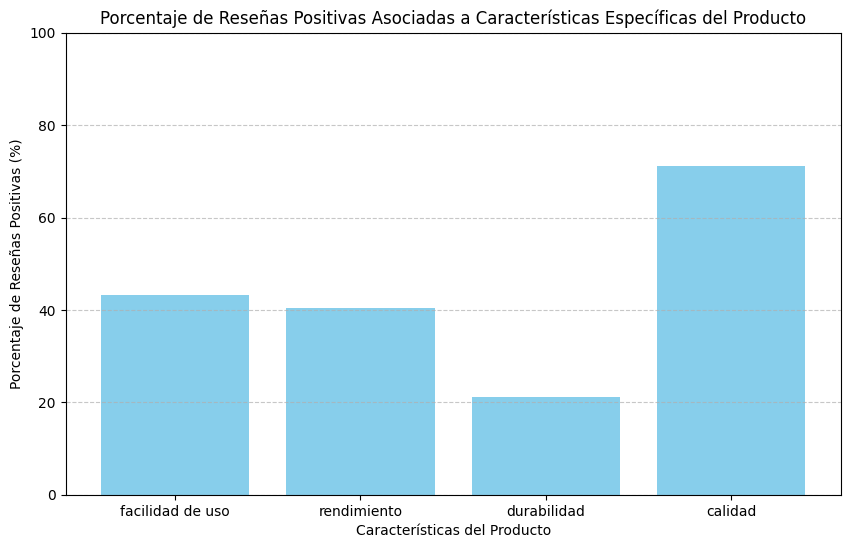

In [ ]:
#Gráfica
import matplotlib.pyplot as plt
import pandas as pd

# Resultados obtenidos
data = {
    'characteristic': ['facilidad de uso', 'rendimiento', 'durabilidad', 'calidad'],
    'percentage': [43.267327, 40.495050, 21.089109, 71.188119]
}

# Convertir los datos en un DataFrame
results_df = pd.DataFrame(data)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(results_df['characteristic'], results_df['percentage'], color='skyblue')
plt.title('Porcentaje de Reseñas Positivas Asociadas a Características Específicas del Producto')
plt.xlabel('Características del Producto')
plt.ylabel('Porcentaje de Reseñas Positivas (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.show()


# Hipotesis 5

In [2]:
import pandas as pd

# Cargar los datos desde el archivo CSV
file_path = '/content/Data-Set-Sentimiento1.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para revisar
df.head()

,product_id,product_name,category_1,category_2,category_3,category_4,discounted_price,actual_price,discount_percentage,about_product,...,user_id_count,review_id,review_title,cleaned_review_content,rating_count,adjusted_rating,tokenized_review,filtered_tokens,stemmed_tokens,sentiment
0,B08XLR6DSB,akiara - Makes life easy Electric Handy Sewing...,Home&Kitchen,Kitchen&HomeAppliances,SewingMachines&Accessories,Sewing&EmbroideryMachines,721,1499.0,0.52,Mini hand Sewing Machine Stapler style is quic...,...,8,RYO77QIQ3J77O,easy to keep and usegood for quick fixesaverag...,its good product you can face challenge in sta...,2449,3.1,"['its', 'good', 'product', 'you', 'can', 'face...","['its', 'good', 'product', 'you', 'can', 'face...","['its', 'good', 'product', 'you', 'can', 'fac'...",0.345417
1,B0978V2CP6,Cubetek 3 in 1 LCD Display V5.0 Bluetooth Tran...,Electronics,"HomeTheater,TV&Video",AVReceivers&Amplifiers,NaN,"1,990",3100.0,0.36,IN V BLUETOOTH AUDIO ADAPTER It has modes TX R...,...,8,R1OK31HXJ4T85Y,gooddoes the job works with two devicespositiv...,atlast i connected successfully working good b...,897,4.0,"['atlast', 'i', 'connected', 'successfully', '...","['atlast', 'i', 'connected', 'successfully', '...","['atlast', 'i', 'connect', 'successfully', 'wo...",0.086984
2,B07WKBD37W,ESnipe Mart Worldwide Travel Adapter with Buil...,HomeImprovement,Electrical,Adapters&Multi-Outlets,NaN,425,999.0,0.57,SLOW CHARGING Input W Output W A MAX Tear Off ...,...,8,R186EFJU37UPS6,material not worthstable for useoverall produc...,i can say costly although it can do the jobi l...,2581,4.0,"['i', 'can', 'say', 'costly', 'although', 'it'...","['i', 'can', 'say', 'costly', 'although', 'it'...","['i', 'can', 'say', 'costly', 'although', 'it'...",0.577500
3,B0B2RBP83P,"Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6"" ...",Computers&Accessories,Laptops,TraditionalLaptops,NaN,"37,247",59890.0,0.38,Processor th Gen Intel Core iG Speed GHz Base ...,...,8,R2WGS6Q7F9F4Y5,value for money laptop for normal usageworks w...,if you are looking for a decent laptop and res...,323,4.0,"['if', 'you', 'are', 'looking', 'for', 'a', 'd...","['if', 'you', 'are', 'looking', 'for', 'decent...","['if', 'you', 'are', 'looking', 'for', 'decent...",0.252041
4,B0BLV1GNLN,WZATCO Pixel | Portable LED Projector | Native...,Electronics,"HomeTheater,TV&Video",Projectors,NaN,"6,490",9990.0,0.35,Small Size but Powerful Effects upgraded Pixel...,...,8,R37T34KL73SH6C,beat projector for good pricevalue for moneyex...,good projector for this price rangenice pictur...,27,4.0,"['good', 'projector', 'for', 'this', 'price', ...","['good', 'projector', 'for', 'this', 'price', ...","['good', 'projector', 'for', 'this', 'pric', '...",0.261765


In [3]:
#Segmentar en base a variable "sentiment"
import pandas as pd
import numpy as np

# Supongamos que tus datos están en un DataFrame llamado df

# Paso 1: Clasificar las reseñas en categorías de sentimiento
df['sentiment_category'] = pd.cut(df['sentiment'], bins=[-np.inf, 0, 0.5, np.inf], labels=['negativo', 'neutro', 'positivo'])

# Paso 2: Calcular la distribución de sentimientos por producto
sentiment_distribution = df.groupby(['product_id', 'sentiment_category']).size().unstack(fill_value=0)

# Calcular el porcentaje de cada categoría de sentimiento
sentiment_distribution['total_reviews'] = sentiment_distribution.sum(axis=1)
sentiment_distribution['positive_percentage'] = (sentiment_distribution['positivo'] / sentiment_distribution['total_reviews']) * 100
sentiment_distribution['negative_percentage'] = (sentiment_distribution['negativo'] / sentiment_distribution['total_reviews']) * 100

# Paso 3: Comparar las calificaciones promedio
product_ratings = df.groupby('product_id')['adjusted_rating'].mean()
sentiment_distribution = sentiment_distribution.join(product_ratings, on='product_id')

# Ver los primeros resultados
print(sentiment_distribution.head())

# Opcional: analizar la correlación entre el porcentaje de reseñas positivas y la calificación promedio
correlation = sentiment_distribution['positive_percentage'].corr(sentiment_distribution['adjusted_rating'])
print(f"Correlación entre porcentaje de reseñas positivas y calificación promedio: {correlation}")


            negativo  neutro  positivo  total_reviews  positive_percentage  \
product_id                                                                   
B002PD61Y4         0       1         0              1                  0.0   
B002SZEOLG         0       1         0              1                  0.0   
B003B00484         0       1         0              1                  0.0   
B003L62T7W         0       0         1              1                100.0   
B004IO5BMQ         0       1         0              1                  0.0   

            negative_percentage  adjusted_rating  
product_id                                        
B002PD61Y4                  0.0              4.1  
B002SZEOLG                  0.0              4.2  
B003B00484                  0.0              4.3  
B003L62T7W                  0.0              4.3  
B004IO5BMQ                  0.0              4.5  
Correlación entre porcentaje de reseñas positivas y calificación promedio: 0.05282274696438098


<ipython-input-3-610e5a112203>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_distribution = df.groupby(['product_id', 'sentiment_category']).size().unstack(fill_value=0)


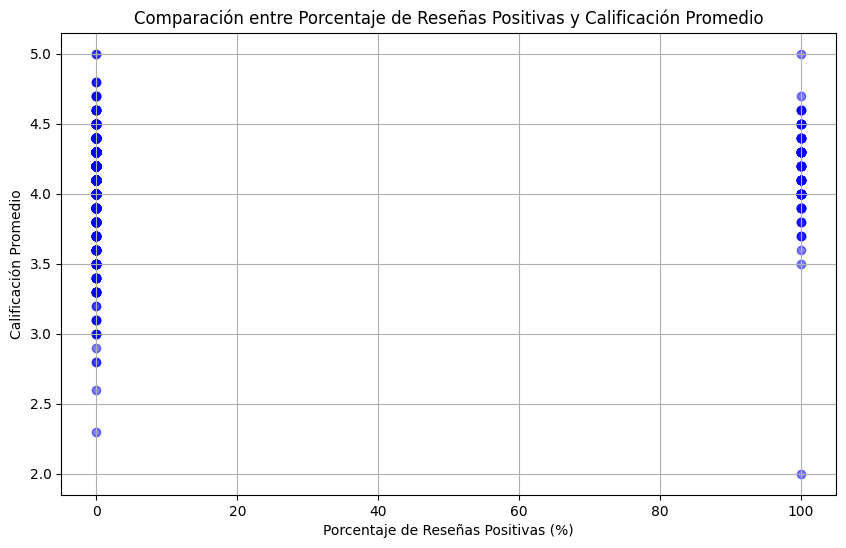

In [ ]:
import matplotlib.pyplot as plt

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(sentiment_distribution['positive_percentage'], sentiment_distribution['adjusted_rating'], color='blue', alpha=0.5)

# Añadir títulos y etiquetas
plt.title('Comparación entre Porcentaje de Reseñas Positivas y Calificación Promedio')
plt.xlabel('Porcentaje de Reseñas Positivas (%)')
plt.ylabel('Calificación Promedio')

# Mostrar la gráfica
plt.grid(True)
plt.show()


In [4]:
# Clasificación de productos en grupos basados en el porcentaje de reseñas positivas
# Definir los umbrales para clasificar los productos
bins = [0, 20, 40, 60, 80, 100]
labels = ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']

sentiment_distribution['positive_sentiment_group'] = pd.cut(sentiment_distribution['positive_percentage'], bins=bins, labels=labels)

# Mostrar la distribución de productos en cada grupo
print(sentiment_distribution['positive_sentiment_group'].value_counts())


positive_sentiment_group
Muy Alto    93
Muy Bajo     0
Bajo         0
Medio        0
Alto         0
Name: count, dtype: int64


In [5]:
# Calcular la correlación entre el porcentaje de reseñas positivas y la calificación promedio
correlation = sentiment_distribution['positive_percentage'].corr(sentiment_distribution['adjusted_rating'])
print(f"Correlación entre porcentaje de reseñas positivas y calificación promedio: {correlation}")


Correlación entre porcentaje de reseñas positivas y calificación promedio: 0.05282274696438098


Nota: Correlación muy baja derivado de las casi nulas reseñas negativas.

In [6]:
# Calcular la calificación promedio para cada grupo de sentimiento positivo
grouped_ratings = sentiment_distribution.groupby('positive_sentiment_group')['adjusted_rating'].mean()

# Mostrar la calificación promedio por grupo de sentimiento positivo
print(grouped_ratings)


positive_sentiment_group
Muy Bajo         NaN
Bajo             NaN
Medio            NaN
Alto             NaN
Muy Alto    4.149462
Name: adjusted_rating, dtype: float64


<ipython-input-6-f35c9a971e49>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_ratings = sentiment_distribution.groupby('positive_sentiment_group')['adjusted_rating'].mean()


In [7]:
# Seleccionar algunos productos específicos para estudio de caso
selected_products = sentiment_distribution[sentiment_distribution['positive_sentiment_group'].isin(['Muy Bajo', 'Muy Alto'])]

# Mostrar detalles de estos productos
print(selected_products[['positive_percentage', 'adjusted_rating']])


            positive_percentage  adjusted_rating
product_id                                      
B003L62T7W                100.0              4.3
B0073QGKAS                100.0              4.3
B009P2L7CO                100.0              4.2
B00B7GKXMG                100.0              4.1
B00GG59HU2                100.0              4.4
...                         ...              ...
B0BJ966M5K                100.0              4.6
B0BM4KTNL1                100.0              4.7
B0BNQMF152                100.0              3.7
B0BP7XLX48                100.0              5.0
B0BPJBTB3F                100.0              2.0

[93 rows x 2 columns]


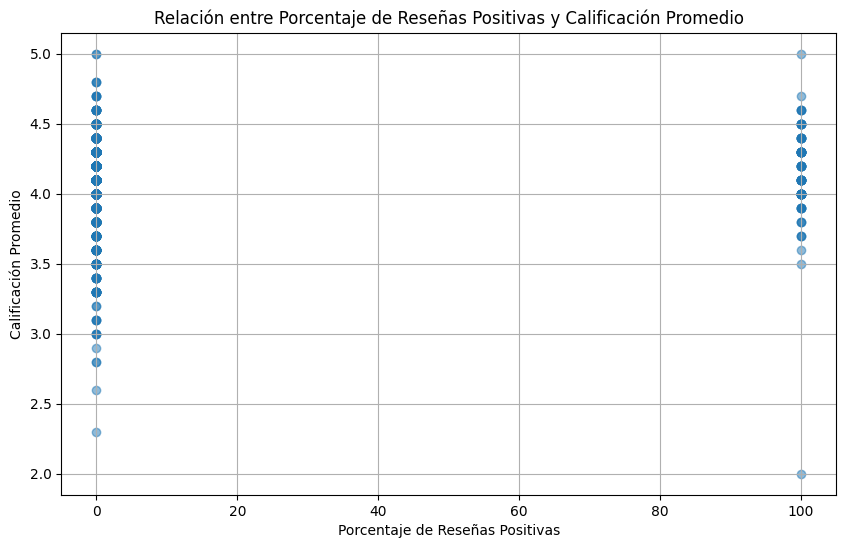

In [8]:
import matplotlib.pyplot as plt

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(sentiment_distribution['positive_percentage'], sentiment_distribution['adjusted_rating'], alpha=0.5)
plt.title('Relación entre Porcentaje de Reseñas Positivas y Calificación Promedio')
plt.xlabel('Porcentaje de Reseñas Positivas')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()


# Hipotesís 5 (correcto)

In [10]:
#Calcular promedios
import pandas as pd

# Paso 1: Agrupar y sacar promedios
grouped_df = df.groupby('product_id').agg({
    'adjusted_rating': 'mean',
    'sentiment': 'mean'
}).reset_index()

# Paso 2: Asignar nombre a las nuevas columnas
grouped_df.rename(columns={
    'adjusted_rating': 'avg_adjusted_rating',
    'sentiment': 'avg_sentiment_score'
}, inplace=True)

# Paso 3: Calcular la correlación entre las variables
correlation = grouped_df['avg_adjusted_rating'].corr(grouped_df['avg_sentiment_score'])

print(f"La correlación entre sentimiento promedio y la calificación promedio es: {correlation:.2f}")

# Puedes también agregar las columnas al DataFrame original si es necesario
df = df.merge(grouped_df, on='product_id', how='left')


La correlación entre la puntuación de sentimiento promedio y la calificación promedio es: 0.16


In [12]:
print(sentiment_distribution.columns)


Index(['negativo', 'neutro', 'positivo', 'total_reviews',
       'positive_percentage', 'negative_percentage', 'adjusted_rating',
       'positive_sentiment_group'],
      dtype='object')


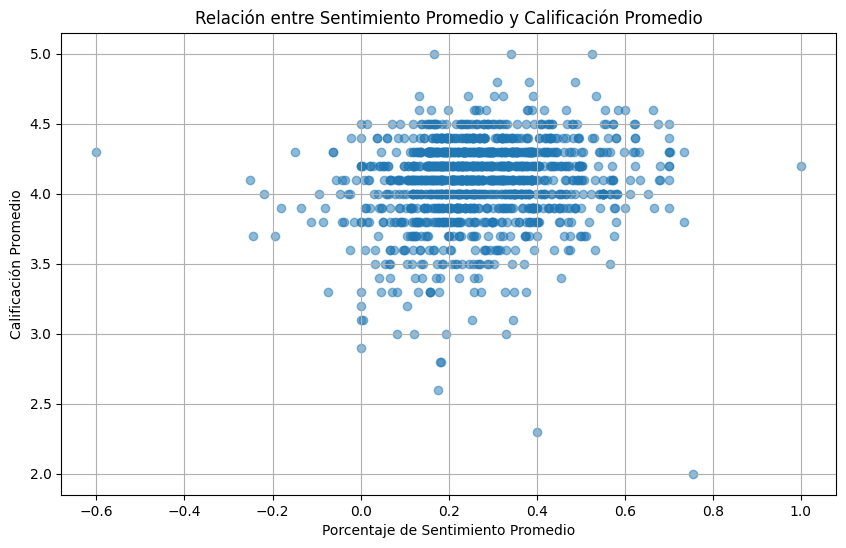

In [13]:
import matplotlib.pyplot as plt

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['avg_sentiment_score'], grouped_df['avg_adjusted_rating'], alpha=0.5)
plt.title('Relación entre Sentimiento Promedio y Calificación Promedio')
plt.xlabel('Porcentaje de Sentimiento Promedio')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()


# Hipótesis 6

La correlación entre la calificación promedio y la satisfacción promedio por categoría es: 0.85


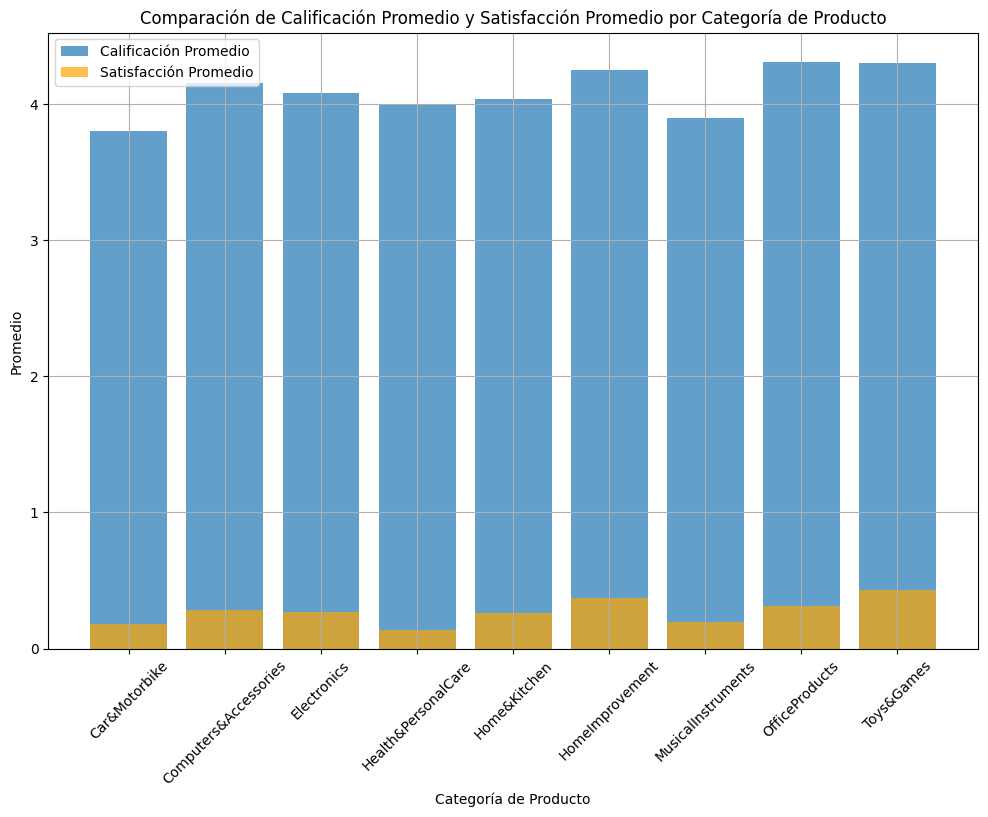

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Agrupación de datos por categoría de producto y cálculo de promedios
category_grouped_df = df.groupby('category_1').agg({
    'adjusted_rating': 'mean',
    'sentiment': 'mean'
}).reset_index()

# Paso 2: Renombrar columnas para claridad
category_grouped_df.rename(columns={
    'adjusted_rating': 'avg_adjusted_rating',
    'sentiment': 'avg_sentiment_score'
}, inplace=True)

# Paso 3: Calcular la correlación entre las dos columnas
correlation = category_grouped_df['avg_adjusted_rating'].corr(category_grouped_df['avg_sentiment_score'])

print(f"La correlación entre la calificación promedio y la satisfacción promedio por categoría es: {correlation:.2f}")

# Paso 4: Crear gráfico de barras comparando calificación promedio y satisfacción promedio por categoría
plt.figure(figsize=(12, 8))
plt.bar(category_grouped_df['category_1'], category_grouped_df['avg_adjusted_rating'], alpha=0.7, label='Calificación Promedio')
plt.bar(category_grouped_df['category_1'], category_grouped_df['avg_sentiment_score'], alpha=0.7, label='Satisfacción Promedio', color='orange')
plt.title('Comparación de Calificación Promedio y Satisfacción Promedio por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Promedio')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#Riesgo Relativo

## Categoría de Descuento vs Categoría de Calificación

In [19]:
import numpy as np

# Calcular con el percentil 75 para "High Discount" en discount_percentage
discount_threshold = np.percentile(df['discount_percentage'], 75)

print(f"Umbral definido para alto descuento (percentil 75): {discount_threshold:.2f}")

# Definir el umbral de calificación
rating_threshold =

# Crear las categorías usando el nuevo umbral
df['high_discount'] = df['discount_percentage'] > discount_threshold
df['low_rating'] = df['adjusted_rating'] < rating_threshold

# Verificar cuántos productos hay en cada categoría
high_discount_count = df['high_discount'].sum()
low_discount_count = (~df['high_discount']).sum()

print(f"Productos con alto descuento: {high_discount_count}")
print(f"Productos con bajo/sin descuento: {low_discount_count}")

# Calcular el riesgo en cada grupo
risk_high_discount = df[df['high_discount']]['low_rating'].mean()
risk_low_discount = df[~df['high_discount']]['low_rating'].mean()

print(f"Riesgo en productos con alto descuento: {risk_high_discount}")
print(f"Riesgo en productos con bajo/sin descuento: {risk_low_discount}")

# Evitar la división por cero
if risk_low_discount != 0:
    risk_relative = risk_high_discount / risk_low_discount
    print(f"El riesgo relativo de tener una calificación baja con un alto descuento es: {risk_relative:.2f}")
else:
    print("No se puede calcular el riesgo relativo porque el riesgo en productos con bajo/sin descuento es 0.")


Umbral definido para alto descuento (percentil 75): 0.62
Productos con alto descuento: 335
Productos con bajo/sin descuento: 1016
Riesgo en productos con alto descuento: 0.008955223880597015
Riesgo en productos con bajo/sin descuento: 0.002952755905511811
El riesgo relativo de tener una calificación baja con un alto descuento es: 3.03


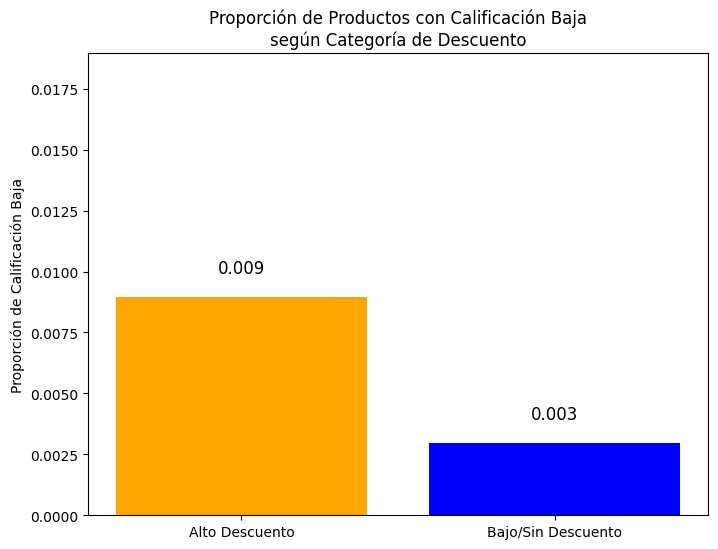

In [20]:
#Gráfica de barras
import matplotlib.pyplot as plt

# Proporciones de productos con calificación baja en cada grupo
proportions = [risk_high_discount, risk_low_discount]
labels = ['Alto Descuento', 'Bajo/Sin Descuento']

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, proportions, color=['orange', 'blue'])

# Añadir detalles a la gráfica
plt.title('Proporción de Productos con Calificación Baja\nsegún Categoría de Descuento')
plt.ylabel('Proporción de Calificación Baja')
plt.ylim(0, max(proportions) + 0.01)  # Ajustar el límite del eje Y para mejor visualización

# Mostrar valores en las barras
for i, v in enumerate(proportions):
    plt.text(i, v + 0.001, f'{v:.3f}', ha='center', fontsize=12)

plt.show()


2.

In [29]:
import pandas as pd

# Definir calificación alta
high_rating_threshold = 4

# Crear la categoría de calificación alta
df['high_rating'] = df['adjusted_rating'] >= high_rating_threshold

# Agrupar por categoría de producto y calcular la proporción de calificaciones altas
category_risk = df.groupby('category_1')['high_rating'].mean().reset_index()

# Renombrar columna para claridad
category_risk.rename(columns={'high_rating': 'risk_high_rating'}, inplace=True)

# Filtrar las categorías válidas (sin NaN ni inf)
filtered_category_risk = category_risk[category_risk['risk_high_rating'] > 0]

# Seleccionar la categoría de referencia (con menor riesgo)
reference_risk = filtered_category_risk['risk_high_rating'].min()

# Calcular el riesgo relativo para cada categoría
filtered_category_risk['relative_risk'] = filtered_category_risk['risk_high_rating'] / reference_risk

# Mostrar los resultados
print(filtered_category_risk)


              category_1  risk_high_rating  relative_risk
1  Computers&Accessories          0.824000       1.648000
2            Electronics          0.738776       1.477551
3    Health&PersonalCare          1.000000       2.000000
4           Home&Kitchen          0.676339       1.352679
5        HomeImprovement          1.000000       2.000000
6     MusicalInstruments          0.500000       1.000000
7         OfficeProducts          1.000000       2.000000
8             Toys&Games          1.000000       2.000000


<ipython-input-29-b0e1770f6826>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_category_risk['relative_risk'] = filtered_category_risk['risk_high_rating'] / reference_risk


# 3.

In [35]:
import pandas as pd

# Definir calificación baja
low_rating_threshold = 3

# Crear la categoría de calificación baja
df['low_rating'] = df['adjusted_rating'] < low_rating_threshold

# Lista de palabras negativas que identificaste
negative_words = ["problem", "low", "bad", "hard", "stopped", "poor", "difficult", "lag", "damaged", "disappointed", "loose", "defective", "cut", "damage", "lower", "disappointed", "defective"]

# Crear una columna que indique si la reseña contiene alguna de estas palabras negativas
df['contains_negative'] = df['cleaned_review_content'].apply(lambda x: any(word in x for word in negative_words))

# Calcular la proporción de calificaciones bajas para reseñas que contienen palabras negativas
risk_with_negative = df[df['contains_negative']]['low_rating'].mean()

# Calcular la proporción de calificaciones bajas para reseñas que no contienen palabras negativas
risk_without_negative = df[~df['contains_negative']]['low_rating'].mean()

# Calcular el riesgo relativo
risk_relative = risk_with_negative / risk_without_negative

# Mostrar los resultados
print(f"Riesgo de calificación baja con palabras negativas: {risk_with_negative:.2f}")
print(f"Riesgo de calificación baja sin palabras negativas: {risk_without_negative:.2f}")
print(f"Riesgo relativo de calificación baja según palabras negativas: {risk_relative:.2f}")


Riesgo de calificación baja con palabras negativas: 0.00
Riesgo de calificación baja sin palabras negativas: 0.00
Riesgo relativo de calificación baja según palabras negativas: 0.94
